In [1]:
import matplotlib.pyplot as plt

In [15]:
# Change it to your respective dataset
dataset = open('./assembly_dataset2.csv', 'r')
dataset.readline()

# Change the condition
condition={'st':"Bihar","ac":"ALAULI"}

content=dataset.readlines()
content1=[]
for i in content:

    s=i.split(",")
    if s[0]==condition["st"] and s[4]==condition["ac"]:
        content1.append(s)
len(content1)

77

In [16]:
# Q1: Identify the candidate who with greatest increase in vote share to the previous election, regardless of the gap between elections?if no answer NA [S]

def greatest_increase_in_vote_share(content):
    max_increase=0
    candidate_name=""
    for i in range(1,len(content)):
        if content[i][11] and content[i-1][1]:
            increase=int(content[i][11])-int(content[i-1][11])
            if increase>max_increase:
                max_increase=increase
                candidate_name=content[i][6]
    if max_increase==0:
        return "NA"
    else:
        return candidate_name
  
greatest_increase_in_vote_share(content1)

'PASHUPATI KUMAR PARAS'

In [17]:
# Q2,Find highest number of female candidates participating in an election year. 0 if no female candidate.[N]
# Q3: In which year (earliest , if multiple years) did the highest number of female candidates contest?[N]

def countfemaleCandidates(year):
    ctr=0
    for i in content1:
        if i[1]==year and i[7]=="F":
            ctr+=1
    return ctr
femaleCandidatesCountYearWise={}
for i in content1:
    if i[1] not in femaleCandidatesCountYearWise.keys():
        femaleCandidatesCountYearWise[i[1]]=countfemaleCandidates(i[1])
femaleCandidatesCountYearWise
            

{'1962': 0,
 '1967': 0,
 '1969': 0,
 '1972': 0,
 '1977': 0,
 '1980': 0,
 '1985': 1,
 '1990': 0,
 '1995': 1,
 '2000': 0,
 '2010': 1,
 '2005': 1}

{'1962': 18752, '1967': 24667, '1969': 20330, '1972': 29999, '1977': 22312, '1980': 28720, '1985': 37020, '1990': 45542, '1995': 43481, '2000': 52740, '2010': 53775, '2005': 40870}
{'1962': 4309, '1967': 14289, '1969': 19424, '1972': 23192, '1977': 18705, '1980': 19280, '1985': 15321, '1990': 17351, '1995': 26124, '2000': 48054, '2010': 36252, '2005': 39951}
{'1962': 25792, '1967': 48380, '1969': 44889, '1972': 54890, '1977': 46056, '1980': 58610, '1985': 57916, '1990': 84220, '1995': 96499, '2000': 103020, '2010': 108355, '2005': 183001}
1962 0.5599798387096774


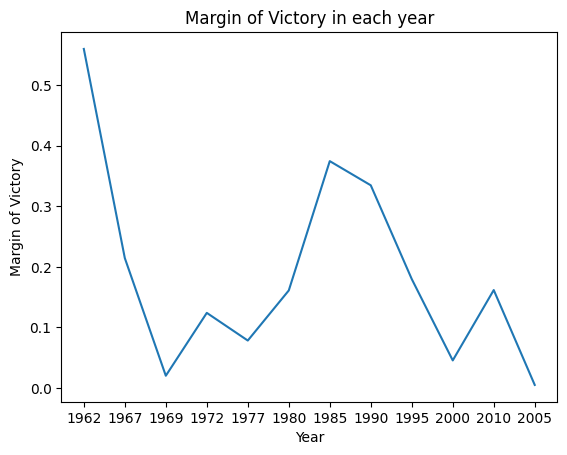

In [18]:
# Q5: In which year did a winning candidate beat the runner-up in this constituency by the highest margin percentage?[N]
# Q4: What is the highest margin percentage a winning candidate has beaten the runner-up in any election within this constituency?[F]

highest_votes_in_year = {}
second_highest_votes_in_year = {}
total_votes_in_year={}
# votes is in the 11th column 
for row in content1:
  if row[1] in total_votes_in_year:
    total_votes_in_year[row[1]]+=int(row[-1])
  else:
    total_votes_in_year[row[1]]=int(row[-1])
  if row[1] in highest_votes_in_year:
    if row[11] == '':
      continue
    if int(row[11]) > highest_votes_in_year[row[1]]:
      second_highest_votes_in_year[row[1]] = highest_votes_in_year[row[1]]
      highest_votes_in_year[row[1]] = int(row[11])
    elif int(row[11]) > second_highest_votes_in_year[row[1]]:
      second_highest_votes_in_year[row[1]] = int(row[11])
  else:
    highest_votes_in_year[row[1]] = int(row[11])
    second_highest_votes_in_year[row[1]] = 0

max_margin = 0
max_margin_year = 0
for year in highest_votes_in_year:
  margin = (highest_votes_in_year[year] - second_highest_votes_in_year[year]) / total_votes_in_year[year]
  if margin > max_margin:
    max_margin = margin
    max_margin_year = year
print(highest_votes_in_year)
print(second_highest_votes_in_year)
print(total_votes_in_year)
print(max_margin_year, max_margin)

# plotting the margins of victory for each year
years = list(highest_votes_in_year.keys())
margins = [(highest_votes_in_year[year] - second_highest_votes_in_year[year]) / total_votes_in_year[year] for year in years]
plt.plot(years, margins)
plt.xlabel('Year')
plt.ylabel('Margin of Victory')
plt.title('Margin of Victory in each year')
plt.show()

In [19]:
# Q6: What was the largest vote margin between the top and bottom candidates in this constituency?[N]
def vote_margin(year):
    maxVote=0
    minVote=10000000000
    for i in content1:
        if i[1] == year:
            if int(i[-1])>maxVote:
                maxVote=int(i[-1])
            if int(i[-1])<minVote:
                minVote=int(i[-1])
    return [maxVote,minVote]
voteMargins={}
for i in content1:
    if i[1] not in voteMargins:
        voteMargins[i[1]]= vote_margin(i[1])[0]-vote_margin(i[1])[1]

voteMargins

{'1962': 18352,
 '1967': 15243,
 '1969': 19738,
 '1972': 29514,
 '1977': 22179,
 '1980': 28457,
 '1985': 36184,
 '1990': 45133,
 '1995': 43366,
 '2000': 50514,
 '2010': 52613,
 '2005': 39708}

In [20]:
#  Q7: In which year did the largest vote margin between the top and bottom candidates occur in this constituency?[N]
maxMarginYear=0
maxMargin=0
for i in voteMargins:
    if voteMargins[i]>maxMargin:
        maxMargin=voteMargins[i]
        maxMarginYear=i
maxMarginYear,maxMargin



('2010', 52613)

In [21]:
# Q8: How many candidates across the years has lost their deposit?[N]
def totalVotes(year):
    total=0
    for i in content1:
        if i[1]==year and i[11] !='':
            total+=int(i[11])
    return total
totalVotesYearWise={}
for i in content1:
    if i[1] not in totalVotesYearWise.keys():
        totalVotesYearWise[i[1]]=totalVotes(i[1])
ctr=0
for i in content1:
    if i[11]!='':
        if int(i[11]) < 1/6 * totalVotesYearWise[i[1]]:
            ctr+=1
ctr

49

In [22]:
# Q9: In how many elections did the winning candidate secure an absolute majority of the votes in this constituency?[N]
def majorityVotes(year):
    total=0
    for i in content1:
        if i[1]==year and i[11] !='':
            total+=int(i[11])
    return total

majorityVotesYearWise={}
for i in content1:
    if i[1] not in majorityVotesYearWise.keys():
        majorityVotesYearWise[i[1]]=majorityVotes(i[1])
ctr=0
for i in content1:
    if i[11]!='':
        if int(i[11]) > 1/2 * majorityVotesYearWise[i[1]]:
            ctr+=1
ctr


6

In [23]:
# Q10: Find latest year in which the winning candidate secured an absolute majority. 0 if no such wins.[N]
# Absolute majority is when the winning candidate has more than 50% of the total votes
def absoluteMajority(year):
    for i in content1:
        if i[1]==year:
            if int(i[11])>0.5*totalVotesYearWise[i[1]]:
                return year
    return 0

years=sorted(list(set([i[1] for i in content1])))
years.reverse()
for i in years:
    if absoluteMajority(i)!=0:
        print(absoluteMajority(i))
        break

2000


In [24]:
# Q11: Which party won the highest number of elections in this constituency? If more parties with equal, select the first party alphabetically.[S]

def winnerParty(year):
    s=''
    max=0
    for i in content1:
        if i[1]==year:
            if i[11]!='':
                if int(i[11])>max:
                    max=int(i[11])
                    s=i[-2]
    return s
winnerEachYear={}
for i in content1:
    if i[1] not in winnerEachYear:
        winnerEachYear[i[1]]=winnerParty(i[1])

counter = {}
for i in winnerEachYear:
    if winnerEachYear[i] in counter:
        counter[winnerEachYear[i]]+=1
    else:
        counter[winnerEachYear[i]]=1
max=0
s=''
for i in counter:
    if counter[i]>max:
        max=counter[i]
        s=i

s, max


('INC', 4)

In [25]:
# Q13: What was the increase in vote share for the party that showed the most significant improvement from one election to the next consecutive one? if the vote share increased from 30percent to 65percent, the improvement is 35.[F]

def voteShare(year,party):
    for i in content1:
        if i[1]==year and i[-2]==party:
            return int(i[11])/totalVotesYearWise[i[1]]
    return 0

def maxIncreaseInVoteShare():
    max=0
    for i in range(len(years)-1):
        for j in content1:
            if j[1]==years[i]:
                if voteShare(years[i+1],j[-2])-voteShare(years[i],j[-2])>max:
                    max=voteShare(years[i+1],j[-2])-voteShare(years[i],j[-2])
    return max
maxIncreaseInVoteShare() * 100

45.10490515888318

In [26]:
# Q14: Which year did the party exhibit the most significant increase in vote share from one election to the next consecutive one?[F]

vote_share_year_wise = {}

for row in content1:
 

  if row[1] in vote_share_year_wise:
    vote_share_year_wise[row[1]][row[10]] = (int(row[-1]) / (totalVotesYearWise[row[1]]) * 100)
  else:
    vote_share_year_wise[row[1]] = {row[10] : (int(row[-1]) / (totalVotesYearWise[row[1]]) * 100)}

year = list(vote_share_year_wise.keys())
max_increase = 0
max_increase_year = 0
max_increase_party = ''
for year_index in range(1, len(vote_share_year_wise)):
  for party in vote_share_year_wise[year[year_index]]:
    if party in vote_share_year_wise[year[year_index - 1]]:
      increase = vote_share_year_wise[year[year_index]][party] - vote_share_year_wise[year[year_index - 1]][party]
      if increase > max_increase:
        max_increase = increase
        max_increase_year = year[year_index]
        max_increase_party = party

print(max_increase_year, max_increase, max_increase_party)

1967 27.98406330364351 IND


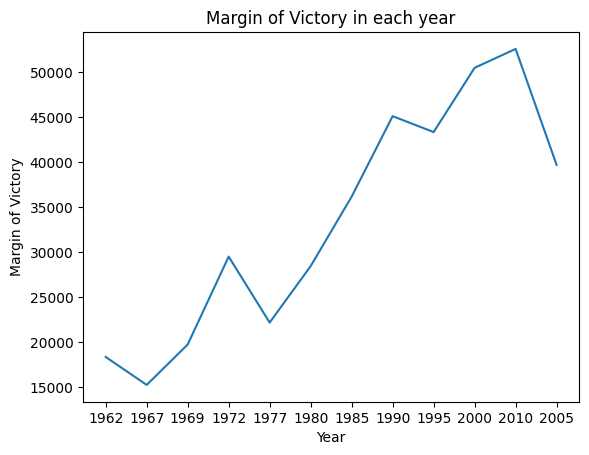

In [27]:
# Plot the trend of the margin of victories across over time. It should be clear wheather the major parties have imporved or worsened 

def marginOfVictory(year):
    maxVote=0
    minVote=10000000000
    for i in content1:
        if i[1] == year:
            if int(i[-1])>maxVote:
                maxVote=int(i[-1])
            if int(i[-1])<minVote:
                minVote=int(i[-1])
    return maxVote-minVote

marginOfVictoryYearWise={}
for i in content1:
    if i[1] not in marginOfVictoryYearWise:
        marginOfVictoryYearWise[i[1]]=marginOfVictory(i[1])

plt.plot(list(marginOfVictoryYearWise.keys()),list(marginOfVictoryYearWise.values()))
plt.xlabel('Year')
plt.ylabel('Margin of Victory')
plt.title('Margin of Victory in each year')
plt.show()